## Stock Simulation Envionment

Simulate an agent trying to buy or sell one piece of stock at a time, given a 

In [445]:
%reset -f

In [446]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.size'] = 14

plt.rcParams['lines.markersize'] = 8

#plt.style.use(['dark_background', 'presentation'])

### Flags
OUTFIGURES   = "../report/figures"
SAVEFIGS = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [447]:
import pandas as pd
import numpy as np
import os

In [448]:
import sys
sys.path.insert(0, "../../")
from mlgtsrc.envs import stock as stock_env, stock_helpers
from mlgtsrc import a4analytics

### Make a plot of a random agent as it buys and sell the stock

In [57]:
r = 0.05
sigma = 0.2
N = 100
S0 = 10
T = 1
strike = 8
gamma = np.exp(-r * T/N)

gbm = stock_env.StockEnv_GBM(r, sigma, N, T, S0)

Total number of states in one time-space dim = 5151
Total number of states = 10302


In [58]:
MAX_ITERATIONS = 500
policy = np.zeros((int(N*(N+1)), 3))
env.reset()
numAssets = 0
for i in range(MAX_ITERATIONS):
    random_action = gbm.action_space.sample()
    if numAssets == 0 and random_action==0:
        policy[i, random_action]        = 1
        numAssets +=1
    elif numAssets == 1 and random_action==2:
        policy[i, random_action]        = 1
        numAssets -=1
    elif random_action==0:
        policy[i, random_action]        = 1
        
    print(f"Taking action {stock_env.actionMap[random_action]}")
    new_state, reward, done, info = gbm.step(
       random_action)
    print(f"new state = {new_state}, reward = {reward}, info = {info}")     
    if done:
        print("Done")
        break

Taking action sell
new state = 2, reward = -10000, info = {'prob': 0.4924975413219068}
Taking action hold
new state = 8, reward = 0, info = {'prob': 0.5075024586780932}
Taking action buy
new state = 15, reward = -10.0, info = {'prob': 0.4924975413219068}
Taking action sell
new state = 22, reward = 9.801986733067553, info = {'prob': 0.4924975413219068}
Taking action hold
new state = 34, reward = 0, info = {'prob': 0.5075024586780932}
Taking action buy
new state = 47, reward = -9.801986733067553, info = {'prob': 0.4924975413219068}
Taking action buy
new state = 61, reward = -10000, info = {'prob': 0.4924975413219068}
Taking action hold
new state = 77, reward = 0, info = {'prob': 0.4924975413219068}
Taking action hold
new state = 95, reward = 0, info = {'prob': 0.4924975413219068}
Taking action buy
new state = 115, reward = -10000, info = {'prob': 0.4924975413219068}
Taking action sell
new state = 136, reward = 8.869204367171573, info = {'prob': 0.4924975413219068}
Taking action hold
new 

In [59]:
policy

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [60]:
stockValues, actions = gbm.render(policy)

['buy', 'sell', 'buy', 'hold', 'hold', 'hold', 'sell', 'hold', 'buy', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold']


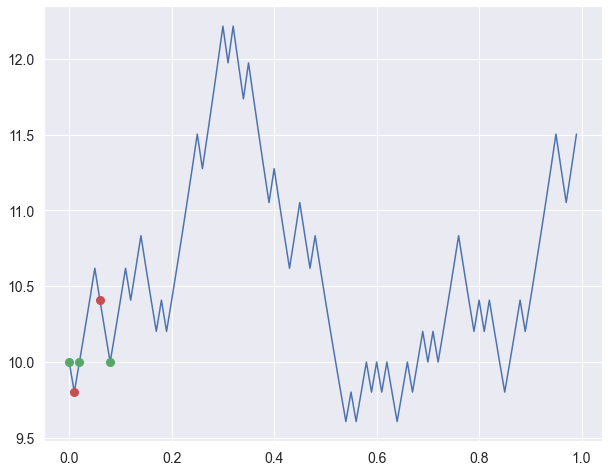

In [64]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
stock_helpers.visualizePolicyForPath(policy, gbm, ax = ax)
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "stock_gbm_sample_path.png"))

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
#plt.style.use(['ggplot'])

### Check the grod implementation by checking the price of an option

In [449]:
r = 0.05
sigma = 0.2
N = 5
S0 = 10
T = 1
strike = 8

gamma = np.exp(-r * T/N)

In [450]:
env = stock_env.StockEnv_OptionPricing(r, sigma, N, T, S0, strike)

Total number of states in one time-space dim = 21
Total number of states = 42


In [451]:
V, n_iter, tota_run_time = a4analytics.valueIteration(env, theta=0.0001, gamma=gamma)

<AxesSubplot:>

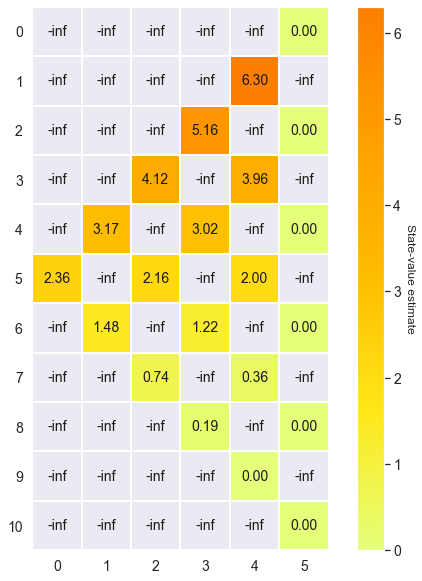

In [452]:
fig, ax = plt.subplots(figsize=(10,10))
stock_helpers.plotValueFunction(V, env, numStock = 0, ax = ax)

### Compare this value with Black Scholes

In [453]:
r = 0.05
sigma = 0.2
N = 100
S0 = 10
T = 1
strike = 8

gamma = np.exp(-r * T/N)

ss = np.arange(5,15,1)

results = {'Black-Scholes': [],
          'Value iteration': []}

for stock in ss:
    env = stock_env.StockEnv_OptionPricing(r, sigma, N, T, stock, strike)
    bsValue = stock_helpers.bs_call(stock, strike, T, r, sigma)
    V, n_iter, tota_run_time = a4analytics.valueIteration(env, theta=0.0001, gamma=gamma)
    simulValue = V[0]
    
    results['Black-Scholes'].append(bsValue)
    results['Value iteration'].append(simulValue)

Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302
Total number of states in one time-space dim = 5151
Total number of states = 10302


In [454]:
results = pd.DataFrame(results)

In [455]:
results

,Black-Scholes,Value iteration
0,0.007948,0.007374
1,0.077378,0.075523
2,0.326783,0.322680
3,0.836047,0.832320
4,1.575285,1.571059
5,2.458884,2.453585
6,3.413543,3.409331
7,4.397611,4.393552
8,5.392424,5.388490
9,6.390827,6.386964


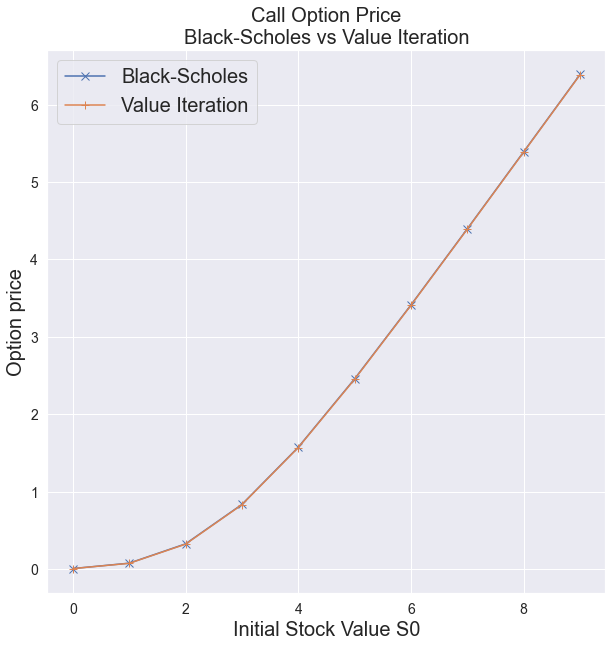

In [463]:
fig, ax = plt.subplots(figsize=(10,10))
results.loc[:, 'Black-Scholes'].plot(ax = ax, marker = 'x', label = 'Black-Scholes')
results.loc[:, 'Value iteration'].plot(ax = ax, marker = '+', label = 'Value Iteration')
ax.set_title("Call Option Price\nBlack-Scholes vs Value Iteration", size = 20)
ax.set_xlabel("Initial Stock Value S0", size = 20)
ax.set_ylabel("Option price", size = 20)
ax.legend(fontsize = 20)
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "stock_bs_vi.png"))

### Plot Value Iteration and Policy Iteration value Functions

Show they are exactly the same

In [520]:
r = 0.02
sigma = 0.2
N = 8
S0 = 10
T = 1
meanRevSpeed = 5.0
env = stock_env.StockEnv_MeanReversion(r, sigma, N, T, S0, meanRevSpeed)

Total number of states in one time-space dim = 45
Total number of states = 90


In [521]:
env.reset()
V_iter, n_iter, tota_run_time = a4analytics.valueIteration(env, theta=0.0001, gamma=gamma)

In [522]:
env.reset()
V_pol_iter, policy, n_iter, tota_run_time = a4analytics.policyIteration(env, theta=0.0001, gamma=gamma)

<AxesSubplot:>

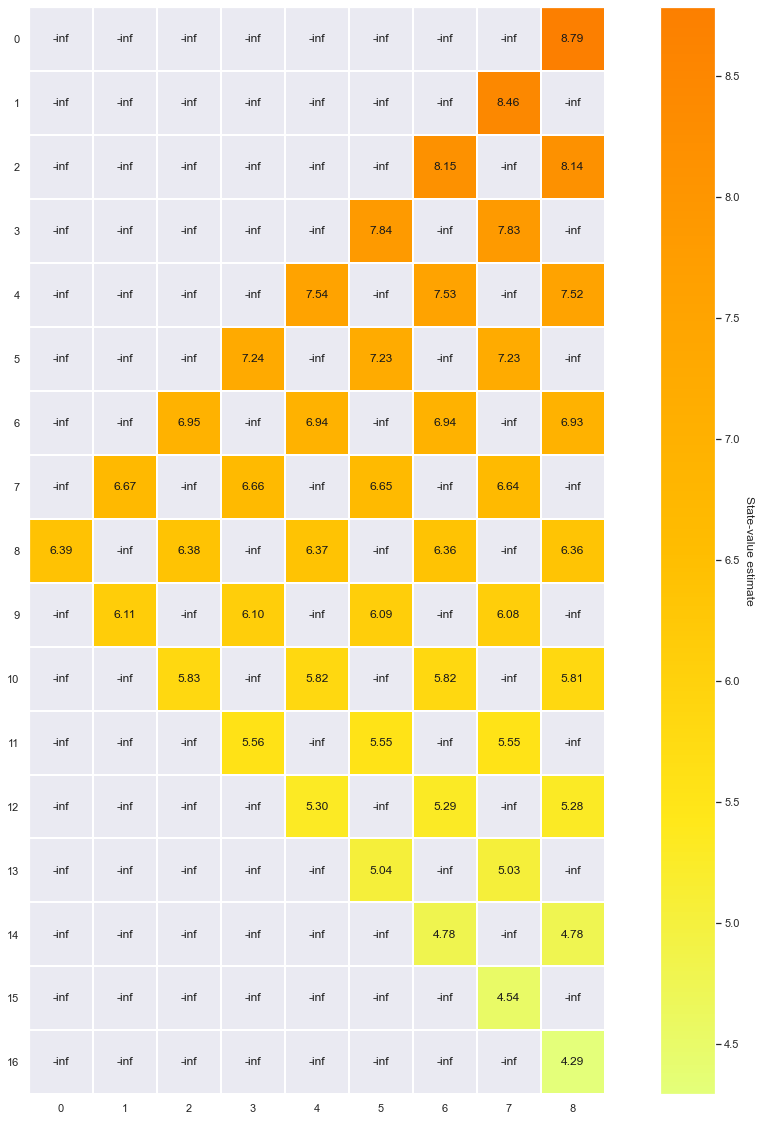

In [484]:
fig, ax = plt.subplots(figsize=(20,20))
stock_helpers.plotValueFunction(V, env, numStock = 1, ax = ax)

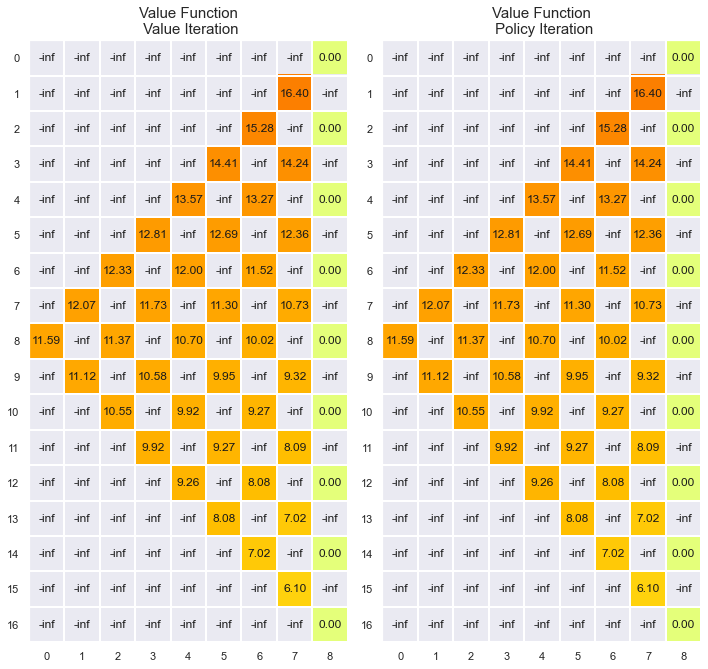

In [523]:
fig = plt.figure(figsize = (10, 20))
ax = fig.add_subplot(1, 2, 1)
stock_helpers.plotValueFunction(V_iter, env, numStock = 1, ax = ax, title = "Value Function\n Value Iteration", removeColorBar = True)

ax = fig.add_subplot(1, 2, 2)
stock_helpers.plotValueFunction(V_pol_iter, env, numStock = 1, ax = ax, title = "Value Function\n Policy Iteration", removeColorBar = True)

fig.tight_layout()

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "stock_policy_vs_val_iter_value_function.png"))


### Compare VI and PI across different state sizes

In [488]:
Ns = [10, 20, 30, 40]

In [489]:
planninResultsTable = pd.DataFrame(columns = ["Problem Size", "Method", 'Number of Iterations', "Time to converge (ms)"])

In [494]:
idx = 0
for N in Ns:
    env = stock_env.StockEnv_MeanReversion(r, sigma, N, T, S0, meanRevSpeed)
    
    for method, planningFunc in zip(['Value Iteration', 'Policy Iteration'], [a4analytics.valueIteration, a4analytics.policyIteration]):
        env.reset()
        if 'policy' in method.lower():
            V, _, n_iter, tota_run_time = planningFunc(env, theta=0.0001, gamma=1.0)
        else:
            V, n_iter, tota_run_time = planningFunc(env, theta=0.0001, gamma=1.0)
        problemSize = env.nS
        planninResultsTable.loc[idx, :] = [problemSize, method, n_iter, tota_run_time*1e3]
        idx+=1


Total number of states in one time-space dim = 66
Total number of states = 132
Total number of states in one time-space dim = 231
Total number of states = 462
Total number of states in one time-space dim = 496
Total number of states = 992
Total number of states in one time-space dim = 861
Total number of states = 1722


In [495]:
planninResultsTable

,Problem Size,Method,Number of Iterations,Time to converge (ms)
0,132,Value Iteration,11,23.973703
1,132,Policy Iteration,52,105.973005
2,462,Value Iteration,21,158.019066
3,462,Policy Iteration,98,639.986038
4,992,Value Iteration,31,508.019209
5,992,Policy Iteration,170,2353.000879
6,1722,Value Iteration,41,1188.008547
7,1722,Policy Iteration,269,6599.998236


### Load results from Q_Learning

In [524]:
src = r"./stock/results-backup"

analyzer = a4analytics.ResultsAnalyzer(src)

stockStateDim = 40 # Only show results for N = 30

sortedResults = analyzer.summarizeResults(stockStateDim)

In [525]:
sortedResults

,Ave Rewards,Rewards Improvement,Exp,Epsilon Scheduler,Run Time,Rewards
18,6.425618,8.676568,187,constantScaleRampDownWithMin,639.503539,"[1.6270487318525344, 0.6125592798373809, 0.894..."
17,6.425618,8.683294,179,constantScaleRampDownWithMin,346.722547,"[1.6270487318525344, 0.6125592798373809, 0.894..."
16,5.903598,9.067634,178,constantScaleRampDownWithMin,663.163556,"[1.6270487318525344, 0.6125592798373809, 0.894..."
9,5.844830,8.995605,162,constantScaleRampDownWithMin,659.642778,"[1.6270487318525344, 0.6125592798373809, 0.894..."
13,5.826854,8.977629,170,constantScaleRampDownWithMin,654.191655,"[1.6270487318525344, 0.6125592798373809, 0.894..."
20,5.757622,6.795612,190,constantScaleRampDownWithMin,387.307456,"[1.6270487318525344, 0.6125592798373809, -8.67..."
19,5.247624,6.285614,189,constantScaleRampDownWithMin,383.723604,"[1.6270487318525344, 0.6125592798373809, -8.67..."
15,5.160163,6.332010,174,constantScaleRampDownWithMin,661.443151,"[1.6270487318525344, 0.6125592798373809, -8.67..."
12,4.402651,4.685869,168,constantScaleRampDownWithMin,359.174987,"[1.6270487318525344, 0.6134835074949354, 1.555..."
0,2.630275,5.781050,146,constantScaleRampDownWithMin,653.715653,"[1.6270487318525344, 0.6125592798373809, 0.894..."


In [508]:
set(sortedResults.loc[:, 'Epsilon Scheduler'])

{'constantScaleRampDownWithMin', 'hyperbolic'}

In [509]:
sortedResults.iloc[:20].iloc[0]

Ave Rewards                                                     6.425618
Rewards Improvement                                             8.676568
Exp                                                                  187
Epsilon Scheduler                           constantScaleRampDownWithMin
Run Time                                                      639.503539
Rewards                [1.6270487318525344, 0.6125592798373809, 0.894...
Name: 18, dtype: object

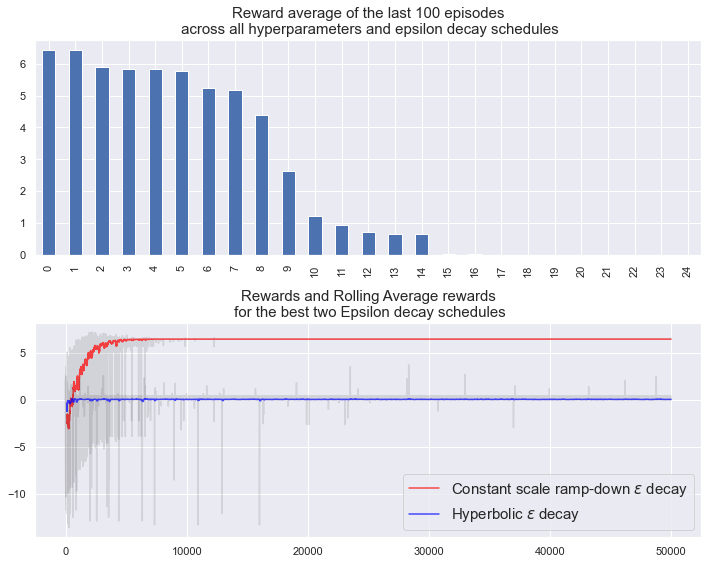

In [510]:
fig, ax = analyzer.plotAllParamsCombinations(sortedResults, layout = 'vertical', figsize = (10,8))
fig.tight_layout()
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "stock_all_results.png"))

### Plot Value function for N = 10, and compare against value Iteration

In [526]:
src = r"./stock/results-backup"

analyzer = a4analytics.ResultsAnalyzer(src)

stockStateDim = 10 # Only show results for N = 30

sortedResults = analyzer.summarizeResults(stockStateDim)

In [527]:
sortedResults.head()

,Ave Rewards,Rewards Improvement,Exp,Epsilon Scheduler,Run Time,Rewards
5,3.26442,7.734720,19,constantScaleRampDownWithMin,239.097358,"[0.0, -8.081361572272982, -7.5085043215493705,..."
10,3.26442,7.740423,35,constantScaleRampDownWithMin,242.050484,"[0.0, -8.081361572272982, -7.5085043215493705,..."
12,3.26442,7.030764,41,constantScaleRampDownWithMin,239.987984,"[0.0, -8.081361572272982, -7.5085043215493705,..."
14,3.26442,7.740423,43,constantScaleRampDownWithMin,232.831732,"[0.0, -8.081361572272982, -7.5085043215493705,..."
11,2.84457,7.314871,4,constantScaleRampDownWithMin,114.284047,"[0.0, -8.081361572272982, -7.5085043215493705,..."


In [528]:
bestConstantScale = analyzer.loadExperiment(19)

In [529]:
r = 0.02
sigma = 0.2
N = 10
S0 = 10
T = 1
meanRevSpeed = 5.0
env = stock_env.StockEnv_MeanReversion(r, sigma, N, T, S0, meanRevSpeed)

Total number of states in one time-space dim = 66
Total number of states = 132


In [530]:
env.reset()
V_iter, n_iter, tota_run_time = a4analytics.valueIteration(env, theta=0.0001, gamma=gamma)

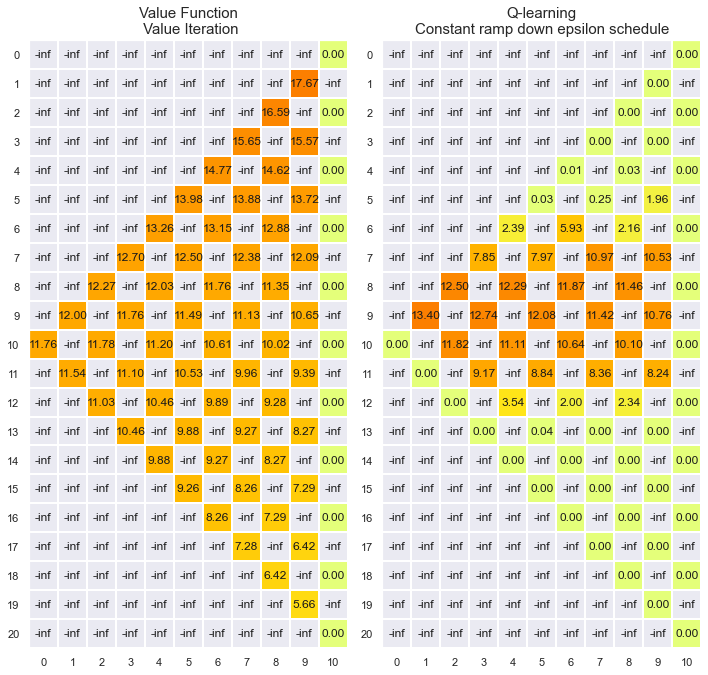

In [532]:
fig = plt.figure(figsize = (10, 20))
ax = fig.add_subplot(1, 2, 1)
stock_helpers.plotValueFunction(V_iter, env, numStock = 1, ax = ax, title = "Value Function\n Value Iteration", removeColorBar = True)

ax = fig.add_subplot(1, 2, 2)
V_q_constRampDown = bestConstantScale['Qlearner'].provideValueFunction()
title = "Q-learning\nConstant ramp down epsilon schedule"
stock_helpers.plotValueFunction(V_q_constRampDown, env, numStock = 1, ax = ax, title = title, removeColorBar = True)

fig.tight_layout()

if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "stock_val_iter_vs_q_learner_value_function.png"))


### Add the iterations and compuational time for Q-Learning across state sizes

In [535]:
src = r"./stock/results-backup"

analyzer = a4analytics.ResultsAnalyzer(src)

In [536]:
stockStateDims = [10, 20, 30, 40]

In [542]:
idx = len(planninResultsTable)
for stockStateDim in stockStateDims:
    sortedResults = analyzer.summarizeResults(stockStateDim)
    bestExpNum = sortedResults.iloc[0, :].loc['Exp']
    bestExp = analyzer.loadExperiment(bestExpNum)
    Q_RunTime = bestExp['run time']
    
    planninResultsTable.loc[idx, :] = [bestExp['env'].nS, "Q-Learning (constant ramp down)", 50_000, Q_RunTime*1e3]
    idx+=1

In [539]:
bestExp.keys()

dict_keys(['rewards_per_episode', 'configParams', 'Qlearner', 'env', 'run time'])

In [543]:
planninResultsTable

,Problem Size,Method,Number of Iterations,Time to converge (ms)
0,132,Value Iteration,11,23.973703
1,132,Policy Iteration,52,105.973005
2,462,Value Iteration,21,158.019066
3,462,Policy Iteration,98,639.986038
4,992,Value Iteration,31,508.019209
5,992,Policy Iteration,170,2353.000879
6,1722,Value Iteration,41,1188.008547
7,1722,Policy Iteration,269,6599.998236
8,132,Q-Learning (constant ramp down),50000,239097.357512
9,462,Q-Learning (constant ramp down),50000,169729.421616


In [550]:
pivoted = pd.pivot(planninResultsTable, index = 'Problem Size', values = 'Time to converge (ms)', columns = 'Method')
pivoted

Method,Policy Iteration,Q-Learning (constant ramp down),Value Iteration
Problem Size,,,
132,105.973005,239097.357512,23.973703
462,639.986038,169729.421616,158.019066
992,2353.000879,606420.536518,508.019209
1722,6599.998236,639503.538609,1188.008547


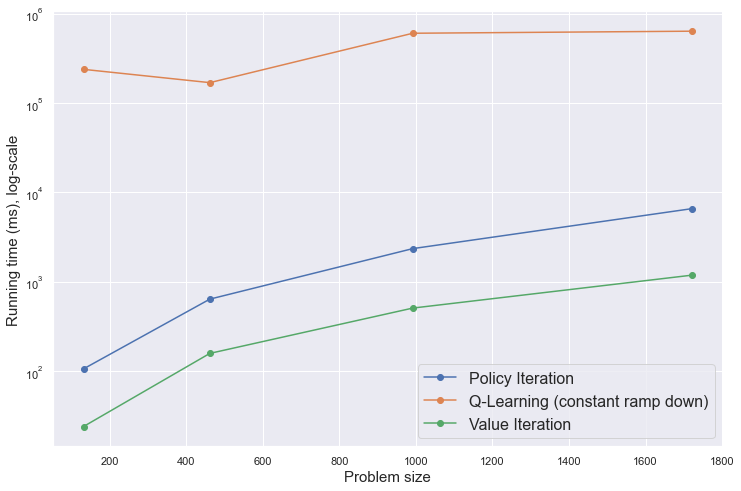

In [569]:
fig, ax = plt.subplots(figsize=(12,8))
pivoted.plot(ax = ax, marker = 'o')
ax.set_yscale('log')
ax.set_xlabel('Problem size', size = 15)
ax.set_ylabel('Running time (ms), log-scale', size = 15)
ax.legend(fontsize = 16)
#ax.tick_params(axis = 'x', size = 16)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize= 16)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize= 16)
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "stock_val_iter_policy_iter_q_vs_problem_size_scatter.png"))

C:\Users\User\AppData\Local\Temp\ipykernel_30692\468494020.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize= 16)


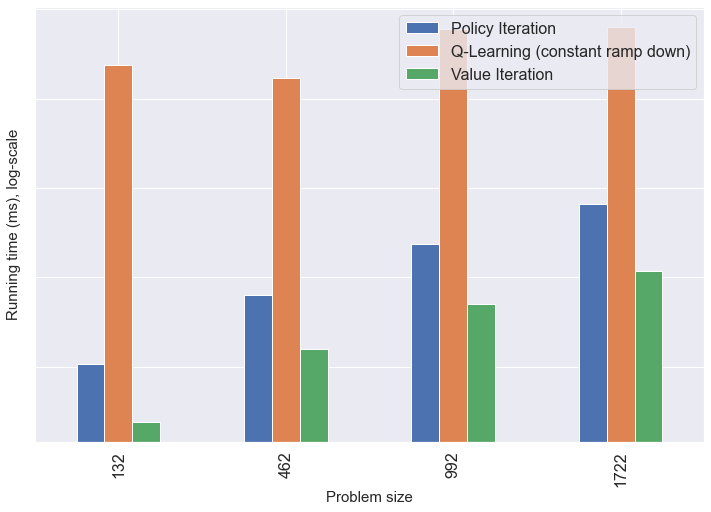

In [570]:
fig, ax = plt.subplots(figsize=(12,8))
pivoted.plot(ax = ax, kind = 'bar')
ax.set_yscale('log')
ax.set_xlabel('Problem size', size = 15)
ax.set_ylabel('Running time (ms), log-scale', size = 15)
ax.legend(fontsize = 16)
#ax.tick_params(axis = 'x', size = 16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize= 16)
if SAVEFIGS:
    fig.savefig(os.path.join(OUTFIGURES, "stock_val_iter_policy_iter_q_vs_problem_size_bar_plot.png"))

C:\Users\User\AppData\Local\Temp\ipykernel_30692\1194235079.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize= 16)


[Text(0, 0.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 2000.0, ''),
 Text(0, 3000.0, ''),
 Text(0, 4000.0, ''),
 Text(0, 5000.0, ''),
 Text(0, 6000.0, ''),
 Text(0, 7000.0, '')]

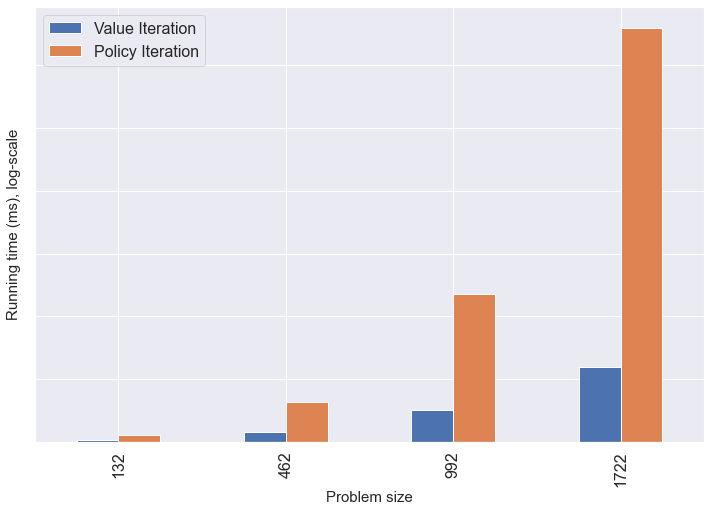

In [564]:
fig, ax = plt.subplots(figsize=(12,8))
pivoted.loc[:, ['Value Iteration', 'Policy Iteration']].plot(ax = ax, kind = 'bar')
#ax.set_yscale('log')
ax.set_xlabel('Problem size', size = 15)
ax.set_ylabel('Running time (ms), log-scale', size = 15)
ax.legend(fontsize = 16)
#ax.tick_params(axis = 'x', size = 16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize= 16)


C:\Users\User\AppData\Local\Temp\ipykernel_30692\4230760531.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize= 16)
C:\Users\User\AppData\Local\Temp\ipykernel_30692\4230760531.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize= 16)


[Text(0, -1000.0, ''),
 Text(0, 0.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 2000.0, ''),
 Text(0, 3000.0, ''),
 Text(0, 4000.0, ''),
 Text(0, 5000.0, ''),
 Text(0, 6000.0, ''),
 Text(0, 7000.0, '')]

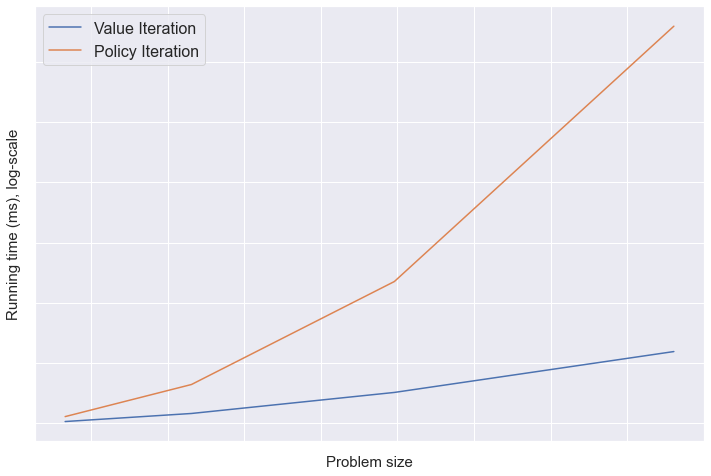

In [566]:
fig, ax = plt.subplots(figsize=(12,8))
pivoted.loc[:, ['Value Iteration', 'Policy Iteration']].plot(ax = ax)
#ax.set_yscale('log')
ax.set_xlabel('Problem size', size = 15)
ax.set_ylabel('Running time (ms), log-scale', size = 15)
ax.legend(fontsize = 16)
#ax.tick_params(axis = 'x', size = 16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize= 16)


### Show Q-learning policy

In [571]:
src = r"./stock/results-backup"

analyzer = a4analytics.ResultsAnalyzer(src)

stockStateDim = 40

sortedResults = analyzer.summarizeResults(stockStateDim)

In [582]:
sortedResults

,Ave Rewards,Rewards Improvement,Exp,Epsilon Scheduler,Run Time,Rewards
18,6.425618,8.676568,187,constantScaleRampDownWithMin,639.503539,"[1.6270487318525344, 0.6125592798373809, 0.894..."
17,6.425618,8.683294,179,constantScaleRampDownWithMin,346.722547,"[1.6270487318525344, 0.6125592798373809, 0.894..."
16,5.903598,9.067634,178,constantScaleRampDownWithMin,663.163556,"[1.6270487318525344, 0.6125592798373809, 0.894..."
9,5.844830,8.995605,162,constantScaleRampDownWithMin,659.642778,"[1.6270487318525344, 0.6125592798373809, 0.894..."
13,5.826854,8.977629,170,constantScaleRampDownWithMin,654.191655,"[1.6270487318525344, 0.6125592798373809, 0.894..."
20,5.757622,6.795612,190,constantScaleRampDownWithMin,387.307456,"[1.6270487318525344, 0.6125592798373809, -8.67..."
19,5.247624,6.285614,189,constantScaleRampDownWithMin,383.723604,"[1.6270487318525344, 0.6125592798373809, -8.67..."
15,5.160163,6.332010,174,constantScaleRampDownWithMin,661.443151,"[1.6270487318525344, 0.6125592798373809, -8.67..."
12,4.402651,4.685869,168,constantScaleRampDownWithMin,359.174987,"[1.6270487318525344, 0.6134835074949354, 1.555..."
0,2.630275,5.781050,146,constantScaleRampDownWithMin,653.715653,"[1.6270487318525344, 0.6125592798373809, 0.894..."


In [583]:
r = 0.02
sigma = 0.2
N = stockStateDim
S0 = 10
T = 1
meanRevSpeed = 5.0
env = stock_env.StockEnv_MeanReversion(r, sigma, N, T, S0, meanRevSpeed)

Total number of states in one time-space dim = 861
Total number of states = 1722


In [584]:
bestExpNum = sortedResults.iloc[0, :].loc['Exp']
bestExp = analyzer.loadExperiment(bestExpNum)

In [585]:
bestExp.keys()

dict_keys(['rewards_per_episode', 'configParams', 'Qlearner', 'env', 'run time'])

In [586]:
qlerner = bestExp['Qlearner']

['buy', 'hold', 'hold', 'sell', 'buy', 'hold', 'hold', 'sell', 'buy', 'sell', 'hold', 'hold', 'buy', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'sell', 'hold']


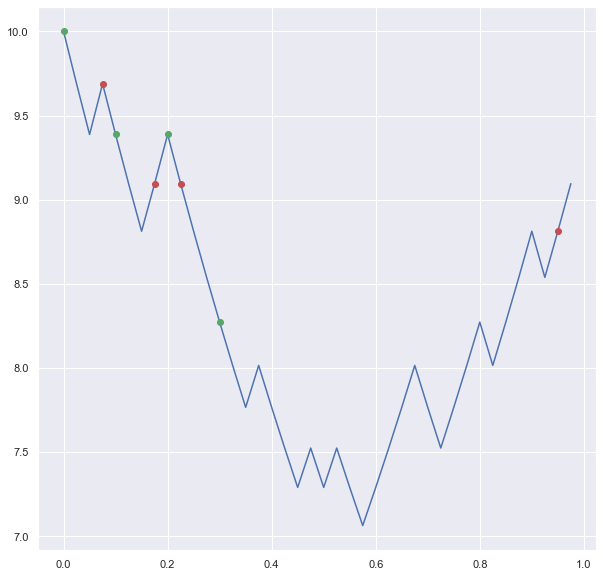

In [591]:
policy = qlerner.providePolicy()

fig, ax = plt.subplots(figsize=(10,10))
stockPath = stock_helpers.visualizePolicyForPath(policy, env, ax = ax)